## Question 1: To obtain Estimated weight vector of W_hat

In [1]:
import numpy as np

# Define U and d based on the example values
U = np.array([[1, 2], [2, 3], [3, 4]])  # 3x2 matrix
d = np.array([1, 2, 3])  # 3x1 vector

# Calculate the conjugate transpose of U
U_H = np.conjugate(U.T)

# Calculate the estimated weight vector Ŵ using the least squares formula
W_hat = np.linalg.inv(U_H @ U) @ U_H @ d

print("Estimated weight vector W_hat:", W_hat)


Estimated weight vector W_hat: [1.00000000e+00 4.88498131e-15]


## Question 2: Compute the Gradient of a Quadratic Function

###We will perform gradient descent using these definitions and a learning rate of 0.1, for 3 iterations.


In [2]:
import numpy as np

# Define the quadratic function
def f(x):
    return np.sum(x ** 2)

# Define the gradient of the function
def grad_f(x):
    return 2 * x

# Gradient Descent function
def gradient_descent(x_start, learning_rate, iterations):
    x = np.array(x_start, dtype=float)  # Convert starting point to numpy array
    for i in range(iterations):
        # Compute the function value
        func_value = f(x)
        print(f"Iteration {i + 1}: f(x) = {func_value}, x = {x}")

        # Compute the gradient
        gradient = grad_f(x)

        # Update x using the gradient and learning rate
        x = x - learning_rate * gradient

# Initial values
x_start = [1, 2, 3]  # starting points
learning_rate = 0.1  # learning rate
iterations = 3  # number of iterations

# Run gradient descent
gradient_descent(x_start, learning_rate, iterations)


Iteration 1: f(x) = 14.0, x = [1. 2. 3.]
Iteration 2: f(x) = 8.96, x = [0.8 1.6 2.4]
Iteration 3: f(x) = 5.7344, x = [0.64 1.28 1.92]


## Question 3: Fitting a Curve with Gaussian Basis Functions

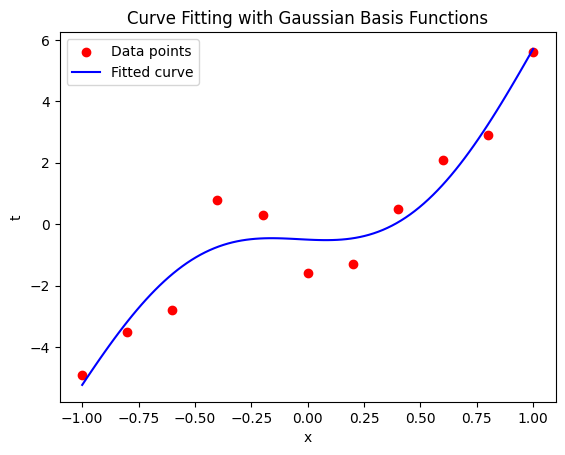

Fitted weights: [-47.78060486  94.19380244 -96.72255754  50.89632057]


In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Given input (x) and output (t)
x = np.array([-1, -0.8, -0.6, -0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])
t = np.array([-4.9, -3.5, -2.8, 0.8, 0.3, -1.6, -1.3, 0.5, 2.1, 2.9, 5.6])

# Number of basis functions (M)
M = 4
# Centers of the Gaussian basis functions (evenly spaced between min and max of x)
mu = np.linspace(np.min(x), np.max(x), M)
# Variance (unity variance means sigma = 1)
sigma = 1.0

# Define Gaussian basis function
def gaussian_basis_function(x, mu, sigma):
    return np.exp(-0.5 * ((x - mu) ** 2) / sigma ** 2)

# Construct the design matrix Phi
def design_matrix(x, mu, sigma):
    Phi = np.zeros((len(x), len(mu)))
    for i in range(len(mu)):
        Phi[:, i] = gaussian_basis_function(x, mu[i], sigma)
    return Phi

# Build the design matrix for the input data x
Phi = design_matrix(x, mu, sigma)

# Solve for weights using least squares: w = (Phi^T * Phi)^-1 * Phi^T * t
w = np.linalg.inv(Phi.T @ Phi) @ (Phi.T @ t)

# Predict values using the fitted model
def predict(x, w, mu, sigma):
    Phi_x = design_matrix(x, mu, sigma)
    return Phi_x @ w

# Plot the original data and the fitted curve
x_plot = np.linspace(-1, 1, 100)
t_pred = predict(x_plot, w, mu, sigma)

plt.scatter(x, t, color='red', label='Data points')
plt.plot(x_plot, t_pred, label='Fitted curve', color='blue')
plt.title('Curve Fitting with Gaussian Basis Functions')
plt.xlabel('x')
plt.ylabel('t')
plt.legend()
plt.show()

# Print weights
print("Fitted weights:", w)
